# Supply and Demand

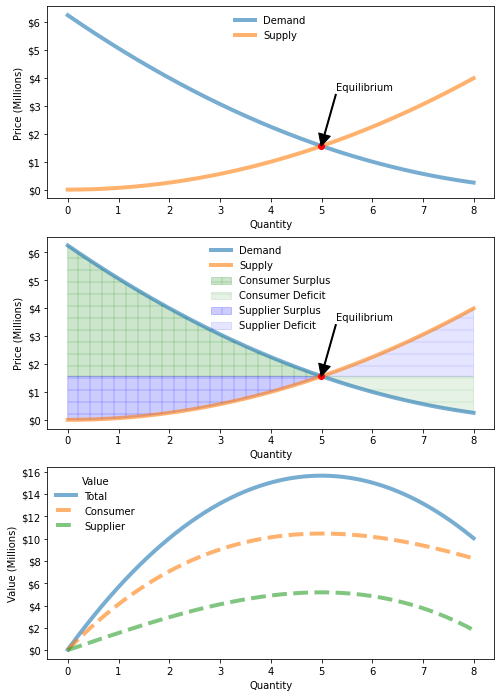

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def supply_curve(q):
    return q*q / 16

def demand_curve(q):
    return (q-10)*(q-10) / 16

q_min = 0
q_max = 8
npoints = 1000
spacing = (q_max-q_min) / 1000

quantity = np.linspace(q_min, q_max, npoints, endpoint=False)
supply = supply_curve(quantity)
demand = demand_curve(quantity)

idx = np.argwhere(np.diff(np.sign(supply - demand))).flatten()[0]
eq_quantity = quantity[idx]
eq_price = supply[idx]

consumer_surplus = np.cumsum(demand - eq_price) * spacing
supplier_surplus = np.cumsum(eq_price - supply) * spacing
total_surplus = consumer_surplus + supplier_surplus

fig, ax = plt.subplots(nrows=3, figsize=(8,12))
#fig.subplots_adjust(hspace=0)

ax[0].plot(quantity, demand, lw=4, alpha=0.6, label='Demand')
ax[0].plot(quantity, supply, lw=4, alpha=0.6, label='Supply')
ax[0].plot(eq_quantity, eq_price, 'ro')
ax[0].set_xlabel('Quantity')
ax[0].set_ylabel('Price (Millions)')
ax[0].yaxis.set_major_formatter('${x:1.0f}')

ax[0].annotate('Equilibrium', 
               xy=(eq_quantity, eq_price), 
               xytext=(eq_quantity+0.3, eq_price+2),
               arrowprops=dict(facecolor='black', width=1))

ax[0].legend(loc="upper center", frameon=False)

ax[1].plot(quantity, demand, lw=4, alpha=0.6, label='Demand')
ax[1].plot(quantity, supply, lw=4, alpha=0.6, label='Supply')
ax[1].plot(eq_quantity, eq_price, 'ro')
ax[1].set_xlabel('Quantity')
ax[1].set_ylabel('Price (Millions)')
ax[1].yaxis.set_major_formatter('${x:1.0f}')

ax[1].annotate('Equilibrium', 
               xy=(eq_quantity, eq_price), 
               xytext=(eq_quantity+0.3, eq_price+2),
               arrowprops=dict(facecolor='black', width=1))

ax[1].fill_between(quantity, eq_price, demand, 
                   where = (demand > eq_price),
                   color = 'green', 
                   alpha = 0.2, 
                   hatch = '+',
                   label='Consumer Surplus')
ax[1].fill_between(quantity, eq_price, demand, 
                   where = (demand < eq_price),
                   color = 'green', 
                   alpha = 0.1, 
                   hatch = '-',
                   label='Consumer Deficit')
ax[1].fill_between(quantity, eq_price, supply, 
                   where = (supply < eq_price),
                   color = 'blue', 
                   alpha = 0.2, 
                   hatch = '+',
                   label='Supplier Surplus')
ax[1].fill_between(quantity, eq_price, supply, 
                   where = (supply > eq_price),
                   color = 'blue', 
                   alpha = 0.1, 
                   hatch = '-',
                   label='Supplier Deficit')
ax[1].legend(loc="upper center", frameon=False)


ax[2].plot(quantity, total_surplus, lw=4, alpha=0.6, label='Total')
ax[2].plot(quantity, consumer_surplus, lw=4, alpha=0.6, ls='--', label='Consumer')
ax[2].plot(quantity, supplier_surplus, lw=4, alpha=0.6, ls='--', label='Supplier')
ax[2].set_xlabel('Quantity')
ax[2].set_ylabel('Value (Millions)')
ax[2].yaxis.set_major_formatter('${x:1.0f}')
ax[2].legend(title='Value', frameon=False)

plt.show()